In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("USArrests.csv",index_col=0)

In [3]:
data

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [4]:
import seaborn as sns

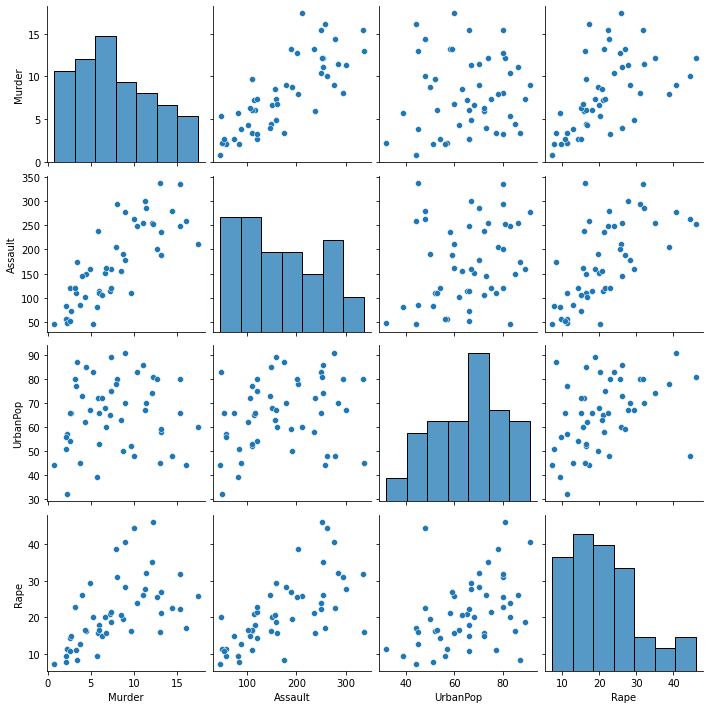

In [6]:
sns.pairplot(data)

In [7]:
data.corr()

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data.loc[:,:] = sc.fit_transform(data)

In [44]:
from sklearn.decomposition import PCA
pc = PCA(n_components=2)

In [45]:
pc_arr = pc.fit_transform(data)
pc_arr.shape

(50, 2)

In [46]:
trans_data = pd.DataFrame(pc_arr, columns = ["PC1","PC2"])

In [47]:
trans_data

,PC1,PC2
0,0.985566,1.133392
1,1.950138,1.073213
2,1.763164,-0.745957
3,-0.141420,1.119797
4,2.523980,-1.542934
5,1.514563,-0.987555
6,-1.358647,-1.088928
7,0.047709,-0.325359
8,3.013042,0.039229
9,1.639283,1.278942


In [48]:
trans_data.corr().round(2)

,PC1,PC2
PC1,1.0,0.0
PC2,0.0,1.0


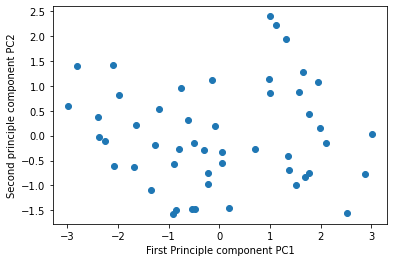

In [49]:
import matplotlib.pyplot as plt
plt.scatter(trans_data['PC1'],trans_data['PC2'])
plt.xlabel("First Principle component PC1")
plt.ylabel("Second principle component PC2")
plt.show()

In [50]:
pc.explained_variance_ratio_ * 100

array([62.00603948, 24.74412881])

In [51]:
from scipy.cluster.hierarchy import linkage, dendrogram
mergings = linkage(trans_data, method = "complete")

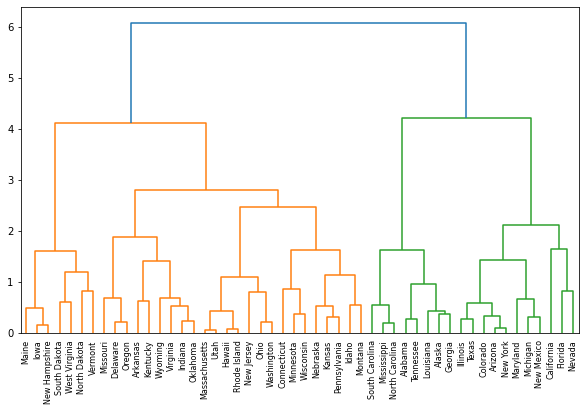

In [52]:
plt.figure(figsize=(10,6))
dendrogram(mergings, labels = data.index)   ### interc cluster distance matrix
plt.show()